# Practica 1

Machine Learning II, done by Cédric Prieels.

The objective of this exercise is to put into practice what has been seen during the theoretical class about the kernel methods used for classification. The main objective is then to do a binary classification using methods studied by using one of our own datasets and to obtain the best paraneters for this classification using a grid search method.

## First step

The first step of the exercise consists then in finding an appropriate dataset to work with. Since I am also doing a thesis in high energy physics, analyzing the data from the LHC particle accelerator of CERN, it seemed only natural to use one of our own dataset. 

We usually work with Monte-Carlo simulations representing the different properties of the backgrounds expected to be seen at the LHC. I then decided to use two files generated using these methods for two different processes: the production of two top quarks (ttbar process) and the production of a Z boson along with some jets (Drell-Yan process). Both processes are quite common at the LHC and have different kinematics: for example, a typical ttbar event comes along with a large amoung of missing transerve energy because of the neutrinos that appears from the decay of the top quark, while the DY process typically gives two leptons (electrons or muons) having an invariant mass close to 90 GeV, the mass of the Z boson itself. Studying these two variables should then be able to help us to binary classify the different events, giving each of them a 'ttbar' or 'DY' label depending on the actual value observed for these two variables, along with the momentum of the two leptons observed, that can also introduce some discrimination.

Since we usually work with rootfiles, the first step consisted in opening one file for each process, read 600 events in each case and write in a CSV file the value of the index, the momentum of the first two leptons, the value of the missing transverse energy (met) generated, the value of mll, the invariant mass of the two leptons, and a label at the end to know which process this event corresponds to. Of course, the goal of this exercise is to actually find this label ourselves, so this should not be used at principle. We will now import this file using python.

In [14]:
import pandas as pd #Let's use panda to read our csv
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("MCdata600.csv")
data["category"] = data["category"].astype('category') #Keep the category as categorical data

#For now, all the ttbar events are put at the beginning of the file and the DY at the end, so let's mix them
data = data.sample(frac=1)
print(data.head(10)) #Print the first variables

      index         pt1        pt2        met         mll category
1066   1066   45.768345  43.516159  82.625893   90.436119       dy
874     874   44.874210  42.041000  29.944307   89.521767       dy
484     484   47.934319  11.839559  97.698029   19.761976    ttbar
436     436   57.363625  13.847028  70.716270   82.569672    ttbar
1105   1105   35.124664  29.855772  57.409435   97.480446       dy
1192   1192  104.029053  23.193913   5.848596   90.286713       dy
1117   1117   38.781387  35.055828  14.845081   95.923950       dy
682     682   51.259697  25.463451  24.137373   83.827721       dy
734     734   30.774981  20.163094  60.237362  102.531761       dy
872     872   42.755699  33.857681  16.029110   92.754990       dy


Let's now group the data by category to plot the different variables at our disposal.

In [15]:
dy = data[data.category == 'dy'] #Data frame for the DY process
ttbar = data[data.category == 'ttbar'] #Data frame for the ttbar process
print(ttbar.head())

     index        pt1        pt2        met        mll category
484    484  47.934319  11.839559  97.698029  19.761976    ttbar
436    436  57.363625  13.847028  70.716270  82.569672    ttbar
431    431  57.772198  51.758972  41.199162  50.352600    ttbar
516    516  48.482399  47.935234  72.445389  30.601095    ttbar
3        3  68.949333  27.469019  32.378071  30.483547    ttbar


We can now study our data to see if we are going to get some discrimination with these variables or not. We can then simply use the describe function of panda dataframes to study some statistical parameters of the different variables.

In [16]:
print("TTbar dataset description: \n")
print(ttbar.describe())
print("\nDY dataset description: \n")
print(dy.describe())

TTbar dataset description: 

            index         pt1         pt2         met         mll
count  600.000000  600.000000  600.000000  600.000000  600.000000
mean   299.500000   74.458213   35.995812   76.651013  102.332450
std    173.349358   42.849141   26.693515   43.654910   80.853896
min      0.000000   18.052942    8.034679    5.519699    1.914350
25%    149.750000   46.747743   20.577390   44.097012   53.765457
50%    299.500000   64.400227   30.209872   70.481342   86.815449
75%    449.250000   91.472946   44.985221  103.486269  128.323723
max    599.000000  418.720459  414.390442  365.013702  873.505432

DY dataset description: 

             index         pt1         pt2         met         mll
count   600.000000  600.000000  600.000000  600.000000  600.000000
mean    899.500000   50.786124   34.744494   31.707284   89.598956
std     173.349358   20.609709   11.806190   18.993010   18.263198
min     600.000000   19.490150    9.771075    1.514080   23.174679
25%     749.750

We clearly see that the mean and standard deviation values are quite different in both cases, especially when considering the mll and met variables that we are going to consider next. Let's now plot this data to see it.

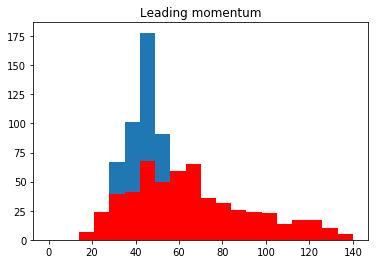

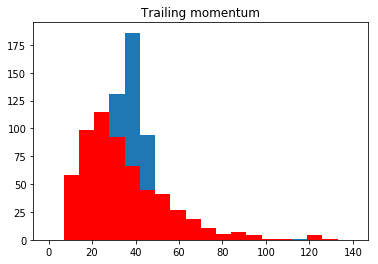

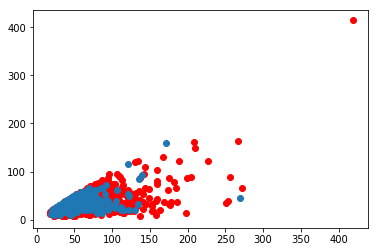

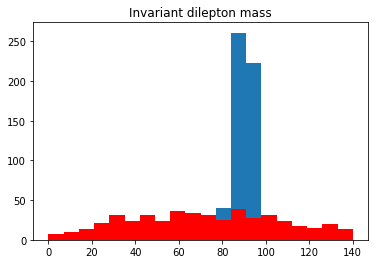

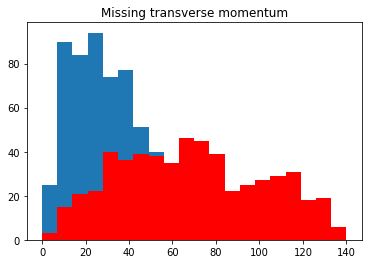

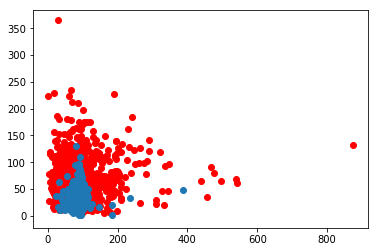

In [17]:
#Important parameters for the plots
nBins = 20
mllRange = (0, 140)
metRange = (0, 140)

#Pt1 distribution
fig, axs = plt.subplots(1, 1)
axs.hist(dy['pt1'], bins=nBins, range=mllRange)
axs.hist(ttbar['pt1'], bins=nBins, range=mllRange, color='red')
axs.set_title('Leading momentum')

#Pt2 distribution
fig, axs = plt.subplots(1, 1)
axs.hist(dy['pt2'], bins=nBins, range=mllRange)
axs.hist(ttbar['pt2'], bins=nBins, range=mllRange, color='red')
axs.set_title('Trailing momentum')

#Momentum scatter distribution
fig, axs = plt.subplots(1, 1)
axs.scatter(ttbar['pt1'], ttbar['pt2'], color='red')
axs.scatter(dy['pt1'], dy['pt2'])

#Mll distribution
fig, axs = plt.subplots(1, 1)
axs.hist(dy['mll'], bins=nBins, range=mllRange)
axs.hist(ttbar['mll'], bins=nBins, range=mllRange, color='red')
axs.set_title('Invariant dilepton mass')

#Met distribution
fig, axs = plt.subplots(1, 1)
axs.hist(dy['met'], bins=nBins, range=mllRange)
axs.hist(ttbar['met'], bins=nBins, range=mllRange, color='red')
axs.set_title('Missing transverse momentum')

#Scatter distribution
fig, axs = plt.subplots(1, 1)
axs.scatter(ttbar['mll'], ttbar['met'], color='red')
axs.scatter(dy['mll'], dy['met'])

We can also quickly check the correlations between these different variables. For this, the easiest way is to plot the following correlation matrix, where the blue (red) color represents a positive (negative) correlation, respectively, whose value is typically represented between -1 and 1. In this case, the strongest correlation is obtained between the two momenta variables and between the pt2 and the mll variable, with a correlation of around 0.6.

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


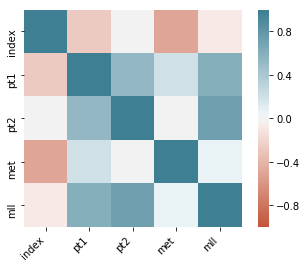

In [19]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Second step

With this latest plot, we clearly see that we do have some overlap between the two datasets so the classification will probably not be perfect for many points. Let's try to do it anyway. We can now start with the binary classification itself. For this, let's first of all split our data into training and test datasets.

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)
print("Train length: " + str(len(train)) + ", test length: " + str(len(test)))

Train length: 840, test length: 360


## Third step

Now that we have our test and train datasets, we can start training a SVM using the training dataset using GridSearch to find the optimal parameters.

In [6]:
from sklearn import svm, preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from time import time #To time the execution of our code
import numpy as np

t0 = time()

xtrain = np.array(train[['pt1', 'pt2', 'mll', 'met']].values.tolist())
ytrain = np.array(train['category'].values.tolist())
xtrain = preprocessing.scale(xtrain) #This is needed to standardize a dataset as this speeds up a lot the grid search
xtest = np.array(test[['pt1', 'pt2', 'mll', 'met']].values.tolist())
ytest = np.array(test['category'].values.tolist())
xtest = preprocessing.scale(xtest)

#Grid search
param_grid = {'C': [1E1, 1E2, 1E3, 1E4], 'gamma': [0.00001, 0.0001, 0.001, 0.01], }
kernels = ('linear', 'rbf', 'poly') #Let's try different kernels as well
clf = {} #Dictionnary to keep the best estimator for each kernel

for kernel in kernels:
    grid = GridSearchCV(SVC(kernel=kernel, class_weight='balanced'), param_grid, cv=3)
    grid.fit(xtrain, ytrain)
    clf[kernel] = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Elapsed time: 142.343s
Best estimator found by grid search:
{'C': 10000.0, 'gamma': 0.01}


## Fourth step

The only step missing consists in testing the best classifier obtained previously.

In [7]:
from sklearn.metrics import accuracy_score

for kernel in kernels:
    print("==============================")
    print("Kernel: " + kernel)
    print("==============================")
    ypred = clf[kernel].predict(xtest)
    print("First 10 predictions: ")
    print(ypred[:10])

    print('Accuracy for our kernel ' + kernel + ' in test: ' +str(round(accuracy_score(ytest, ypred)*100, 2))+"%")

Kernel: linear
First 10 predictions: 
['ttbar' 'ttbar' 'dy' 'ttbar' 'dy' 'dy' 'dy' 'dy' 'dy' 'ttbar']
Accuracy for our kernel linear in test: 79.17%
Kernel: rbf
First 10 predictions: 
['ttbar' 'ttbar' 'dy' 'ttbar' 'ttbar' 'dy' 'dy' 'dy' 'dy' 'ttbar']
Accuracy for our kernel rbf in test: 90.56%
Kernel: poly
First 10 predictions: 
['ttbar' 'ttbar' 'dy' 'ttbar' 'dy' 'dy' 'dy' 'dy' 'dy' 'ttbar']
Accuracy for our kernel poly in test: 74.72%


From this study, based on only 600 events in order to reduce the computing time, but applied to a real physical problem with only a low discrimination (as seen on the previous plots, some points are quite hard to distinguish in the 2D plane) and two variables used (mll, met), we are able to separate the DY and ttbar processes with an accuracy up to 90.56% using the test dataset (and this efficiency drops to around 82% when using only two (mll and met) out of the 4 available variables). This has been achieved using a rbf kernel for the SVM method and the optimal parameters C=10000.0 and gamma = 0.01. The other two kernels considered (linear and poly) achieve an efficiency much lower in this particular case.